In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q')
machine = provider.get_backend('ibmq_armonk')
from qiskit.test.mock import FakeLondon
machine_fake = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Gate Inversion Function

In [2]:
def split(word): 
    return [char for char in word] 
import math 

def PiReader(string):
    '''
    Converts symbol experession to numerical answer
    
    Assumption: should not contain decimal
    '''
    
    #null case 
    if string == "0" or string == "0.0": 
        return 0
    
    temp = []
    expression = 1
    
    arry = split(string)
    i = 0
    
    while (i<len(arry)): 
        element = arry[i]

        #number
        if element.isdigit():
            
            number = int(element)
            i+=1
#             #to make sure 2,3,.. digit case is accounted for
#             while(arry[i].isdigit()):
#                 number = number*10 +int(arry[i])
#                 i+=1
#             #finally multiplying by the number
            expression*=number
            
        #negative sign 
        elif element == '-':
            expression *= -1
            i+=1
            
        #pi 
        elif element == 'p':
            expression *= float(math.pi)
            i+=2   #skip the 'i'
            
        #division sign
        elif element == "/": 
            expression/= int(arry[i+1])
            i+=2
        elif element == "*":
            i+=1
        else:
            print('Erront in parsing angle.... char is ' + element)
            expression*=1
            i+=1

    return expression

In [3]:
import math 

def u3Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u3
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    
    #Obtaining all useful information 
    #print(strings)
    gate = strings[0]
    qubit = strings[4]
    orig_angles = strings[1:4]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,3): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1] + ',' + new_angles[2] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 
    

In [4]:
def u1Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u1
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[2]
    orig_angles = strings[1:2]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(1): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [5]:
def u2Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u2
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[3]
    orig_angles = strings[1:3]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,2): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1]+ ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [6]:
def cXInverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: a pair of gates in qasm string representation to amplify error in the given gate by factor of 3
    """
    #barrier for 2 qubit circuit only
    #barrier ="""barrier q[0],q[1];"""
    x_gate_0 = """x qr[0];"""
    #x_gate_1 = """x qr[1];"""
    x_gates =  x_gate_0  #'\n'+x_gate_1
    
    return barrier + '\n' + x_gates+ '\n' + barrier + '\n' + orig_gate_str +'\n' +barrier + '\n'+x_gates + '\n' + barrier + '\n'

In [26]:
import random 
debug = []

def GateInverter(circ): 
    """
    Input: a circuit (with u3 and cnot gates only)
    Output: Inverting the circuit
    """
    #for creating barriers!
    n_qubits = circ.num_qubits
    qubit_str = ""
    if (n_qubits == 1): qubit_str= "qr[0]"
    elif (n_qubits == 2): qubit_str= "qr[0],q[1]"
    
    barrier = "barrier " + qubit_str + ";"
    
    x_gate_0 = """x qr[0];"""
    #x_gate_1 = """x qr[1];"""
    x_gates =  x_gate_0  #'\n'+x_gate_1
    #iterating over the circuit in string representation
    
    
    newqasm_str=""
    circ_str=circ.qasm()
    #print("Converting circ to string using Qasmstring function in Quantum Ciruit")
    #print(circ_str)
    
    qregname=circ.qregs[0].name
    global debug 
    debug = []
    
    for line in iter(circ_str.splitlines()):
#         if line.startswith('cx'):
#             newqasm_str += cXInverter(line, barrier)
#         elif line.startswith('u3'):
#             newqasm_str += u3Inverter(line, barrier)
#         elif line.startswith('u2'):
#             newqasm_str += u2Inverter(line, barrier)
#         elif line.startswith('u1'):
#             newqasm_str += u1Inverter(line, barrier)
        if line.startswith('qreg'):
            newqasm_str+=line+"\n"
            newqasm_str+=x_gates+"\n"
        elif line.startswith('measure'):
            #newqasm_str+=x_gates+"\n"
            newqasm_str+=line+"\n"
        else:
            newqasm_str+=line+"\n"
    #print("------------------------------------")
    #print("passing a modified qasm string to from_qasm_str method of quantum circuit")
    
    #print(newqasm_str)

    circo=QuantumCircuit().from_qasm_str(newqasm_str)
    
    return circo 

## Generate RB Circuits

In [8]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#Import Qiskit classes 
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

In [9]:
#Generate RB circuits (2Q RB)

#number of qubits
nQ=1
rb_opts = {}
#Number of Cliffords in the sequence
rb_opts['length_vector'] = [1] +[30*i for i in range(1, 70)]
#Number of seeds (random sequences)
rb_opts['nseeds'] =1
#Default pattern
rb_opts['rb_pattern'] = [[0]]

rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)

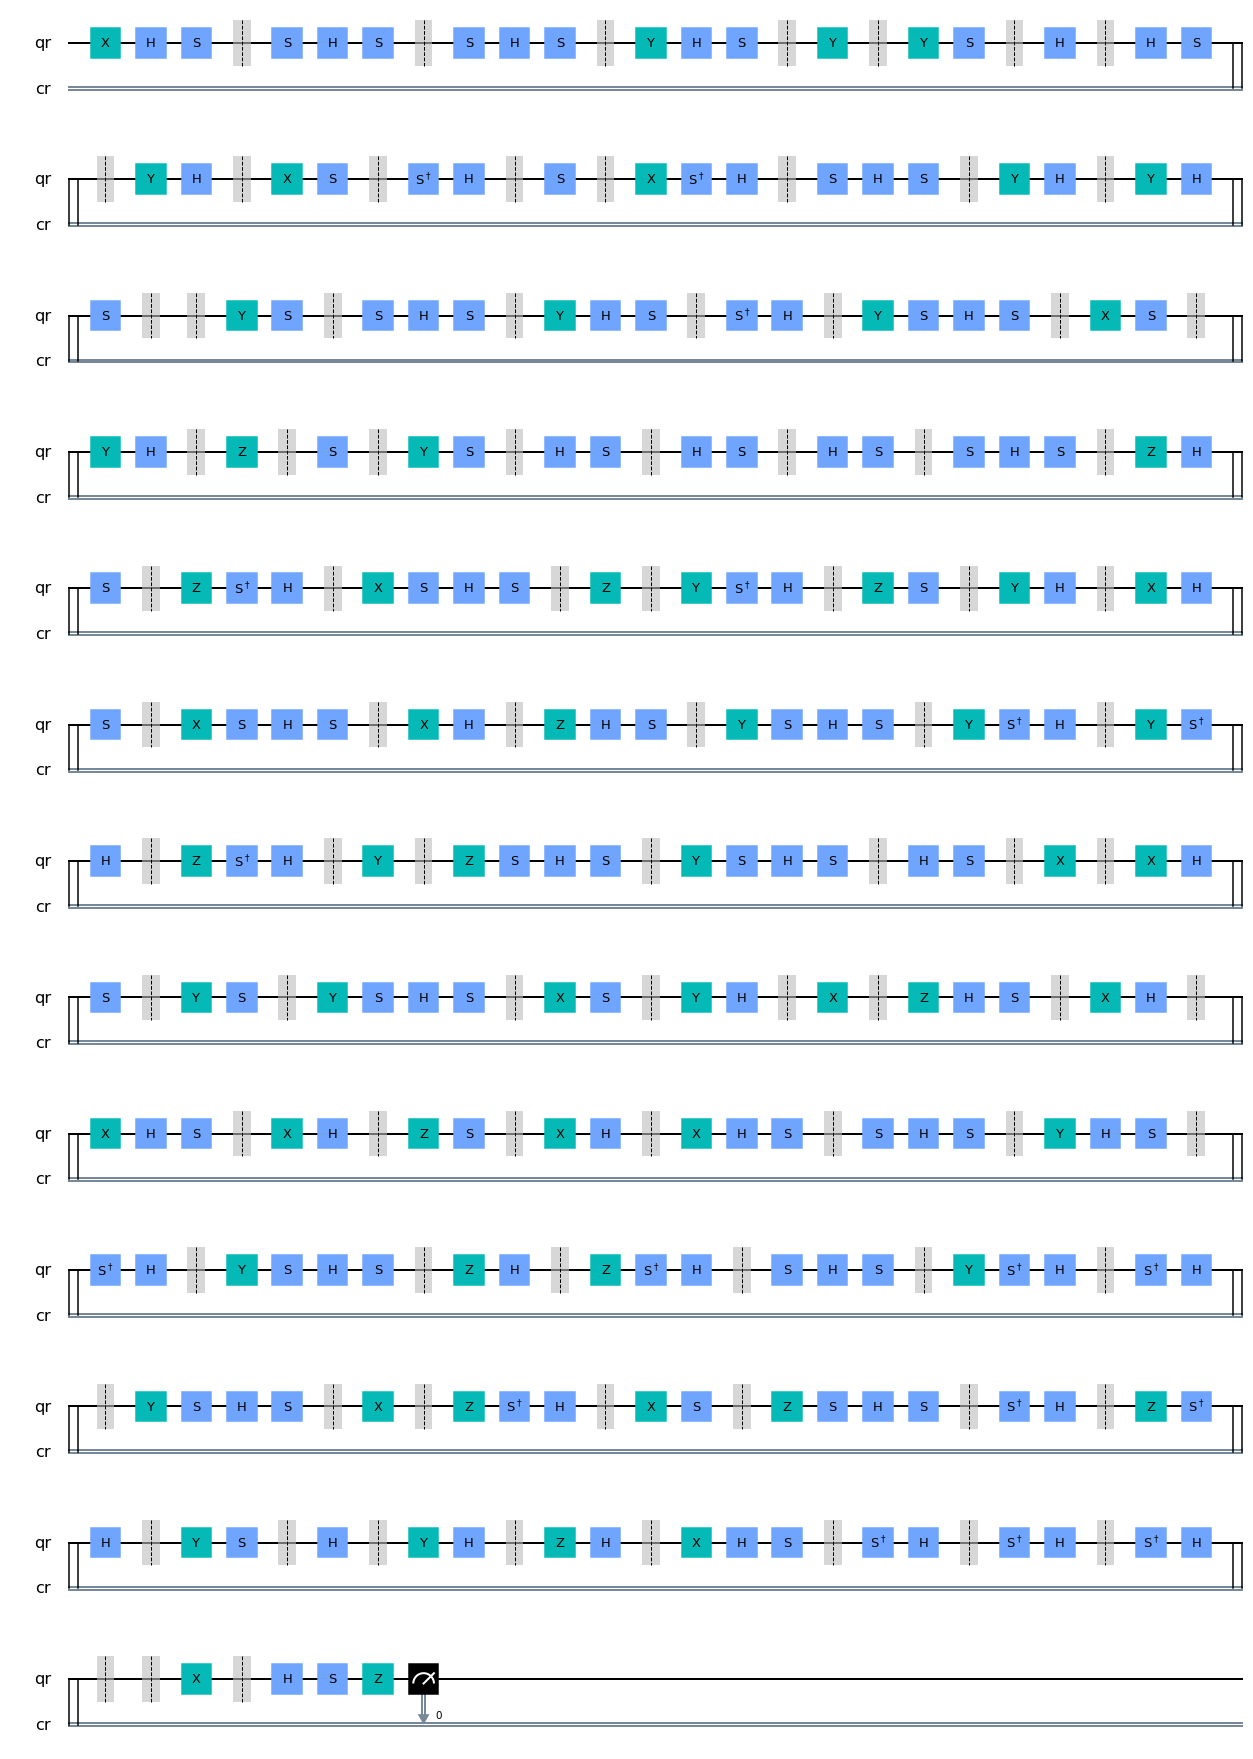

In [10]:
rb_circs[0][3].draw(output = 'mpl')

In [11]:
# converting everything to u3

from qiskit.compiler import transpile
basis_gates =  ['id', 'u3']

rb_transpiled_circs = []

for i in range(len(rb_circs)): 
    seed_circs = []
    for j in range(len(rb_circs[i])): 
        transpiled_circ = transpile(rb_circs[i][j], basis_gates = basis_gates)
        seed_circs.append(transpiled_circ)
    rb_transpiled_circs.append(seed_circs)

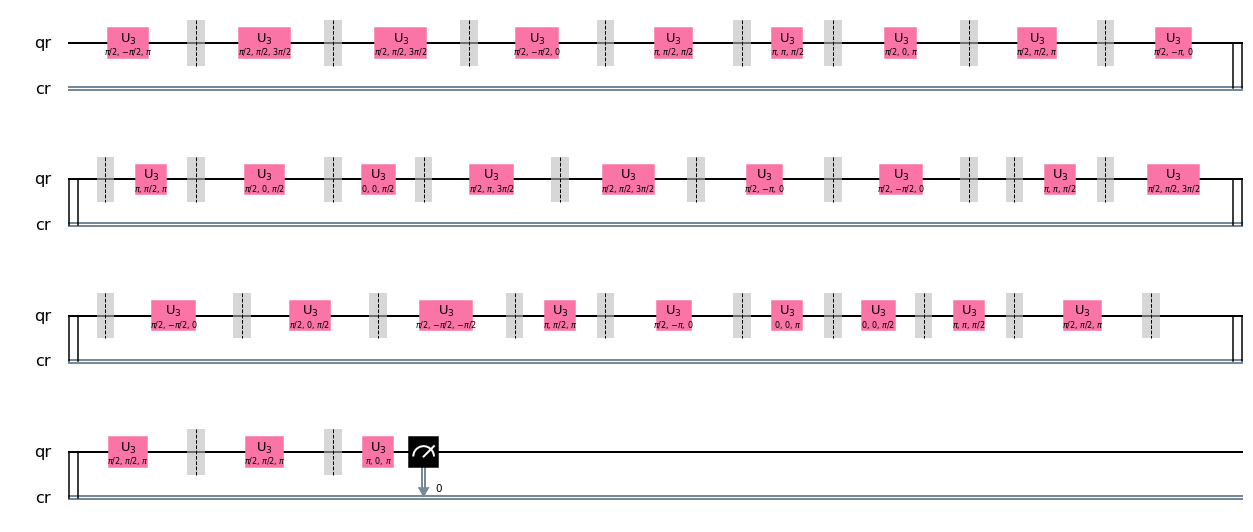

In [12]:
rb_transpiled_circs[0][1].draw(output = 'mpl')

In [13]:
rb_transpiled_circs = rb_transpiled_circs[0]

## Now Inverting Circuits

In [27]:
rb_inverted_circs = []
for circ in rb_transpiled_circs:
    rb_inverted_circs.append(GateInverter(circ))

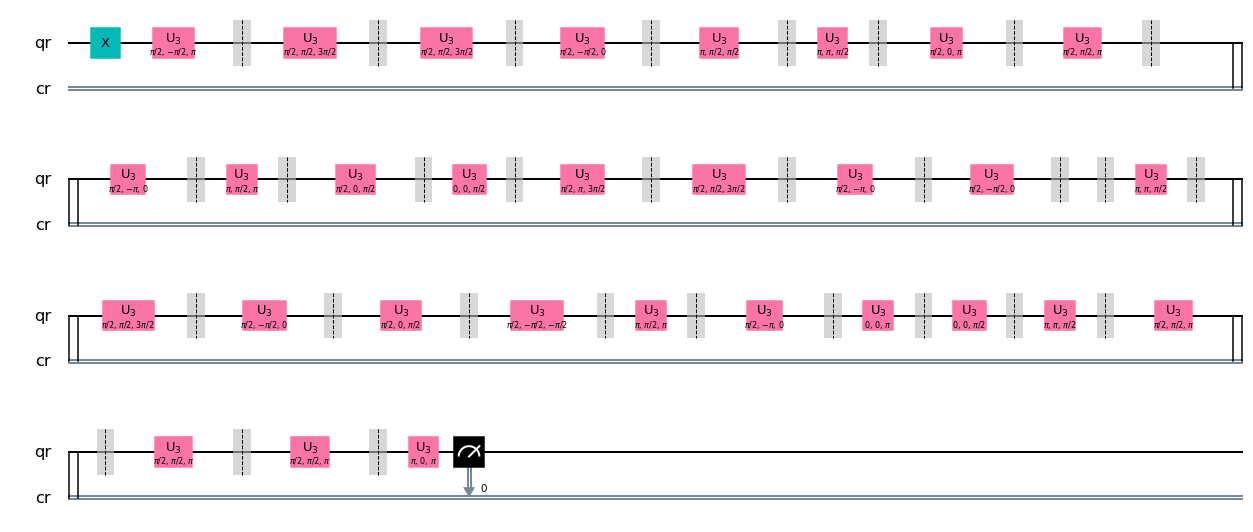

In [28]:
rb_inverted_circs[1].draw(output = 'mpl')

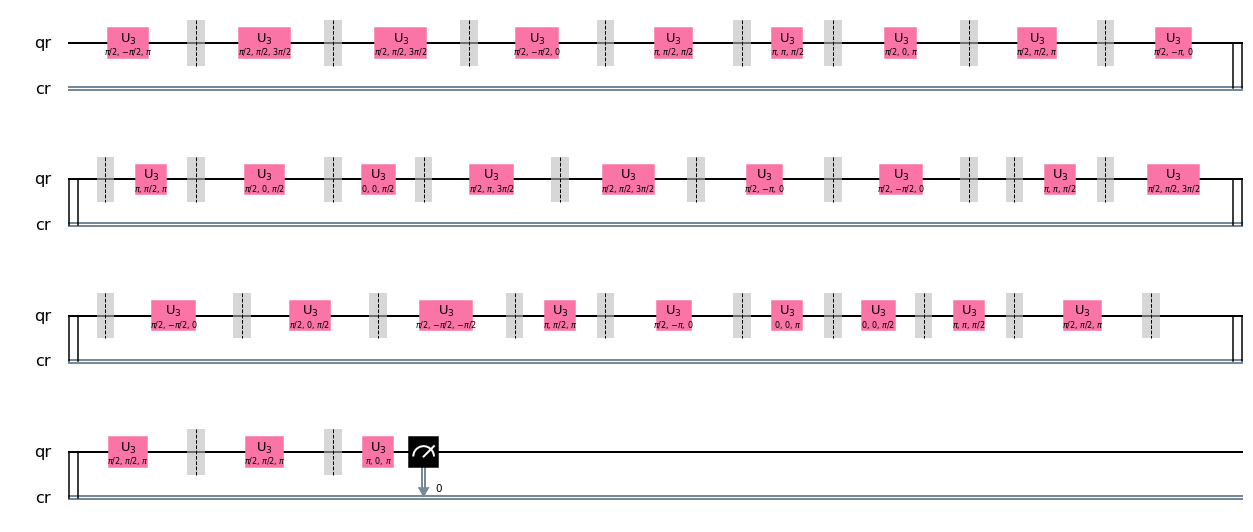

In [29]:
rb_transpiled_circs[1].draw(output = 'mpl')

## Running the Schedules

In [30]:
def countsToProb(counts, samples, invert): 
    '''
    Input: counts 
    Output: prob 
    '''
    result = (counts['0']/samples)
    if(invert):
        result = (counts['1']/samples)
    return result

In [31]:
def averagingSeeds(seeds):
    '''
    Input: list of seed probs - buckets are seeds, each with prob for particular gate length
    Output: a single list of probs of gate lengths (averaging across all seeds)
    '''
    gate_lengths = len(seeds[0])
    n_seeds = len(seeds)
    
    
    result =[] # contain averaged out probs of gate lengths
    
    for i in range(gate_lengths):
        summ = 0
        for j in range(n_seeds): 
            summ += seeds[j][i]
        summ/= n_seeds 
        result.append(summ)
        
    return result

In [32]:
def addDicts(listy): 
    '''
    Input: list of dicts of counts 
    Output: combining all dicts into one dict, returning that
    '''
    keys = ['0', '1']
    master = {}
    
    for key in keys: 
        #initializing master at that key
        master[key] = 0
        
        #now adding up all dictys[key]
        for dicty in listy: 
            try:
                master[key] += dicty[key]
            except KeyError: 
                continue
    return master

In [33]:
from qiskit.tools.monitor import job_monitor
def evaluator(circuits, samples, backend, noise_model = None, monitor = False, invert = False):
    """
    Input: circuit, noise model to run on , weights of the local hammys
    Output: expectation value (energy)
    
    """
    
    #Running the circuits 
    orig_samples = samples
    num_circuits = len(circuits)
    results = [[] for i in range(num_circuits)] # box for each circuit
    
    
    while(samples!=0):
        countses = []
        
        if (samples>8192):
            job =  execute(circuits, backend = backend, shots = 8192)
            if(monitor):
                job_monitor(job)
            countses = job.result().get_counts()
            samples-= 8192
        else: 
            job =  execute(circuits, backend = backend, shots = samples)
            if(monitor):
                job_monitor(job)
            countses = job.result().get_counts()
            samples = 0
        #distributing counts to right boxes
        for i in range(num_circuits):
            #print(countses)
            results[i].append(countses[i])
        
    print('Running Circuit done')
    #adding up all the dicts
    
    counties = [addDicts(circ_counts_list) for circ_counts_list in results]
    
    print('Adding dicts done')
    #computing expectation values
    prob = [countsToProb(counties[i], orig_samples, invert) for i in range(num_circuits)]
    print('Computing prob done')
        
    return prob

# Running Circs

In [34]:
results_orig  = []
results_inverted = []
samples = 8192

results_orig = evaluator(rb_transpiled_circs, samples, machine,monitor = True, invert= False)
    
results_inverted = evaluator(rb_inverted_circs, samples, machine, monitor = True, invert = True)


Job Status: job has successfully run
Running Circuit done
Adding dicts done
Computing prob done
Job Status: job has successfully run
Running Circuit done
Adding dicts done
Computing prob done


In [35]:
len(rb_transpiled_circs)

70

## Plotting Results

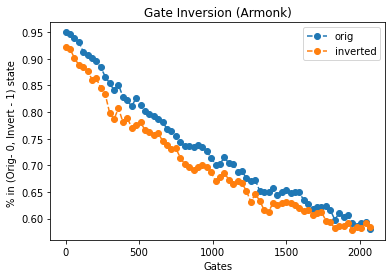

In [36]:
import matplotlib.pyplot as plt 


a = plt.figure()
 
plt.plot(rb_opts['length_vector'], results_orig, marker = 'o', linestyle= '--', label= "orig")
plt.plot(rb_opts['length_vector'], results_inverted, marker = 'o', linestyle= '--', label= "inverted")

plt.title('Gate Inversion (Armonk)')
plt.xlabel('Gates')
plt.ylabel('% in (Orig- 0, Invert - 1) state ')
plt.legend()
plt.show()
a.savefig("plotSep22(8).png", dpi = 1000)

In [24]:
p1_0 = machine.properties().qubit_property(0, 'prob_meas1_prep0')[0]
p0_1 = machine.properties().qubit_property(0, 'prob_meas0_prep1')[0]
print('Armonk')
print(" P(1|0) = " + str(p1_0))
print(" P(0|1) = " + str(p0_1))

Armonk
 P(1|0) = 0.05059999999999998
 P(0|1) = 0.0762


In [25]:
print('Fake London')
for i in range(5):
    print('Qubit: ' + str(i) +' -----------------------------------')
    p1_0 = machine_fake.properties().qubit_property(i, 'prob_meas1_prep0')[0]
    p0_1 = machine_fake.properties().qubit_property(i, 'prob_meas0_prep1')[0]
    print(" P(1|0) = " + str(p1_0))
    print(" P(0|1) = " + str(p0_1))

Fake London
Qubit: 0 -----------------------------------
 P(1|0) = 0.01
 P(0|1) = 0.050000000000000044
Qubit: 1 -----------------------------------
 P(1|0) = 0.02
 P(0|1) = 0.07666666666666666
Qubit: 2 -----------------------------------
 P(1|0) = 0.14
 P(0|1) = 0.18999999999999995
Qubit: 3 -----------------------------------
 P(1|0) = 0.0033333333333332993
 P(0|1) = 0.03
Qubit: 4 -----------------------------------
 P(1|0) = 0.006666666666666667
 P(0|1) = 0.043333333333333335
